In [1]:
# library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('flood_tool/resources/postcodes_labelled.csv')
data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0


missing data / no duplicates

In [ ]:
# data.duplicated().sum()
missing = data.isnull().sum() / len(data) *100
missing

postcode                  0.00000
easting                   0.00000
northing                  0.00000
soilType                  0.00000
elevation                 0.00000
nearestWatercourse       37.61375
distanceToWatercourse     0.00000
localAuthority            0.00000
riskLabel                 0.00000
medianPrice               7.75250
historicallyFlooded       0.00000
dtype: float64

training data first 80% of data based on easting (in acsending order)
testing data rest

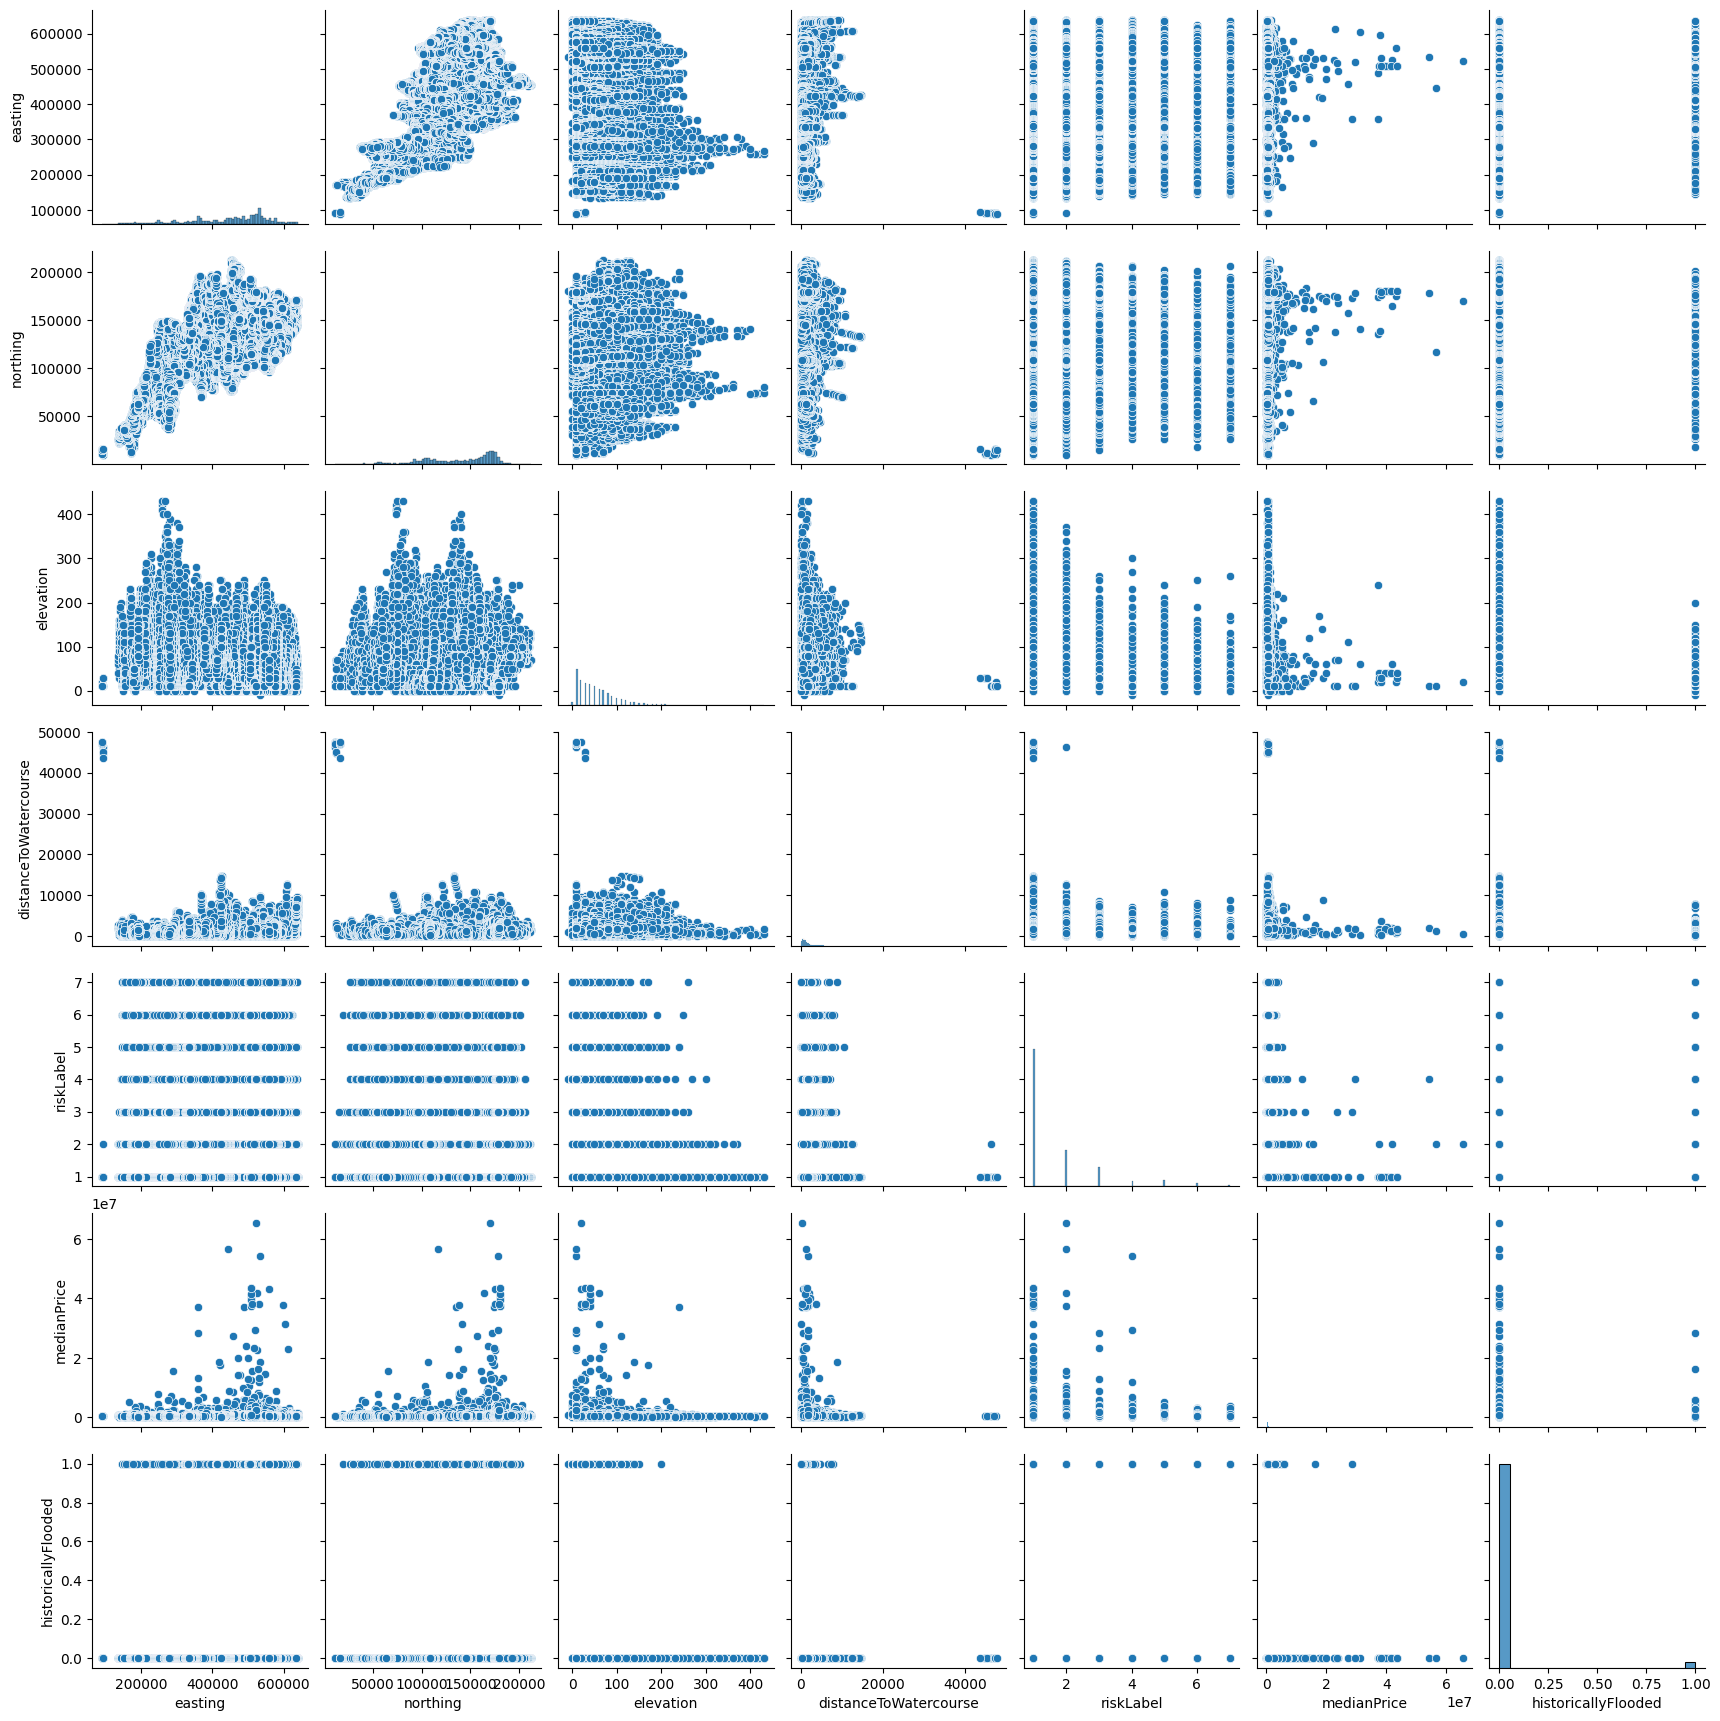

In [9]:
import seaborn as sns

num_cols = data.select_dtypes(include=[np.number]).columns

sns.pairplot(data[num_cols])

In [69]:
def geo_train_test_split(data, min_threshold = 0, max_threshold = int(len(data)*0.8)):
    data = data.sort_values(by = "easting")

    data_test = data[max_threshold:]
    data_train = data[:max_threshold]

    return pd.DataFrame(data_train), pd.DataFrame(data_test)

train_data = geo_train_test_split(data)[0]
test_data = geo_train_test_split(data)[1]

In [68]:
geo_train_test_split(data)[0]

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded
76172,TR24 0QE,88849,15298,Histosols,10,NaN,47630.0,Isles of Scilly,1,NaN,0
76171,TR24 0QD,89156,15418,Histosols,10,NaN,47310.0,Isles of Scilly,1,NaN,0
76169,TR24 0PU,89278,15851,Histosols,10,NaN,47110.0,Isles of Scilly,1,NaN,0
76170,TR24 0PW,89312,15655,Histosols,10,NaN,47110.0,Isles of Scilly,1,NaN,0
76161,TR21 0JF,90098,10601,Unsurveyed/Urban,20,NaN,47470.0,Isles of Scilly,1,374800.0,0
...,...,...,...,...,...,...,...,...,...,...,...
55091,SE4 2QE,536062,175191,Unsurveyed/Urban,30,Ravensbourne River,1910.0,Lewisham,1,519500.0,0
55584,SE8 5DW,536062,178645,Unsurveyed/Urban,0,River Thames,1180.0,Lewisham,4,1934600.0,0
54379,SE23 2JJ,536063,172860,Unsurveyed/Urban,40,Pool River,1450.0,Lewisham,1,580300.0,0
53566,SE16 5XP,536070,180509,Unsurveyed/Urban,10,River Thames,220.0,Southwark,4,461300.0,1


no corrlation between numerical columns

<Axes: >

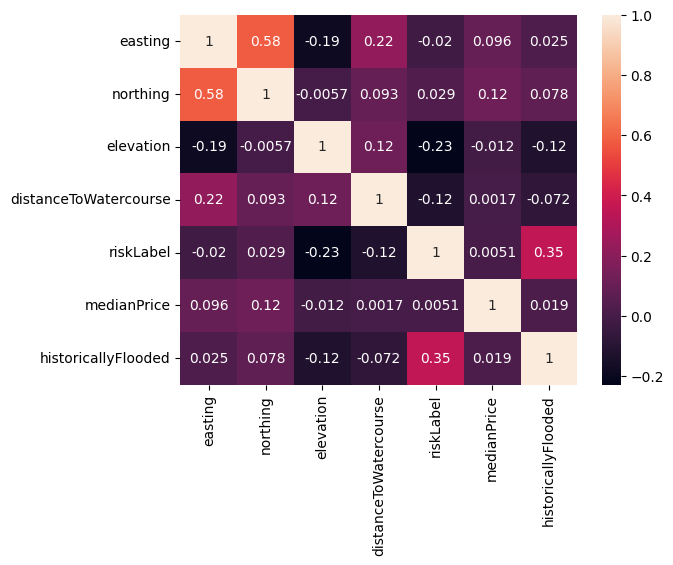

In [21]:
data_corr = data[num_cols].corr()

sns.heatmap(data_corr, annot=True)

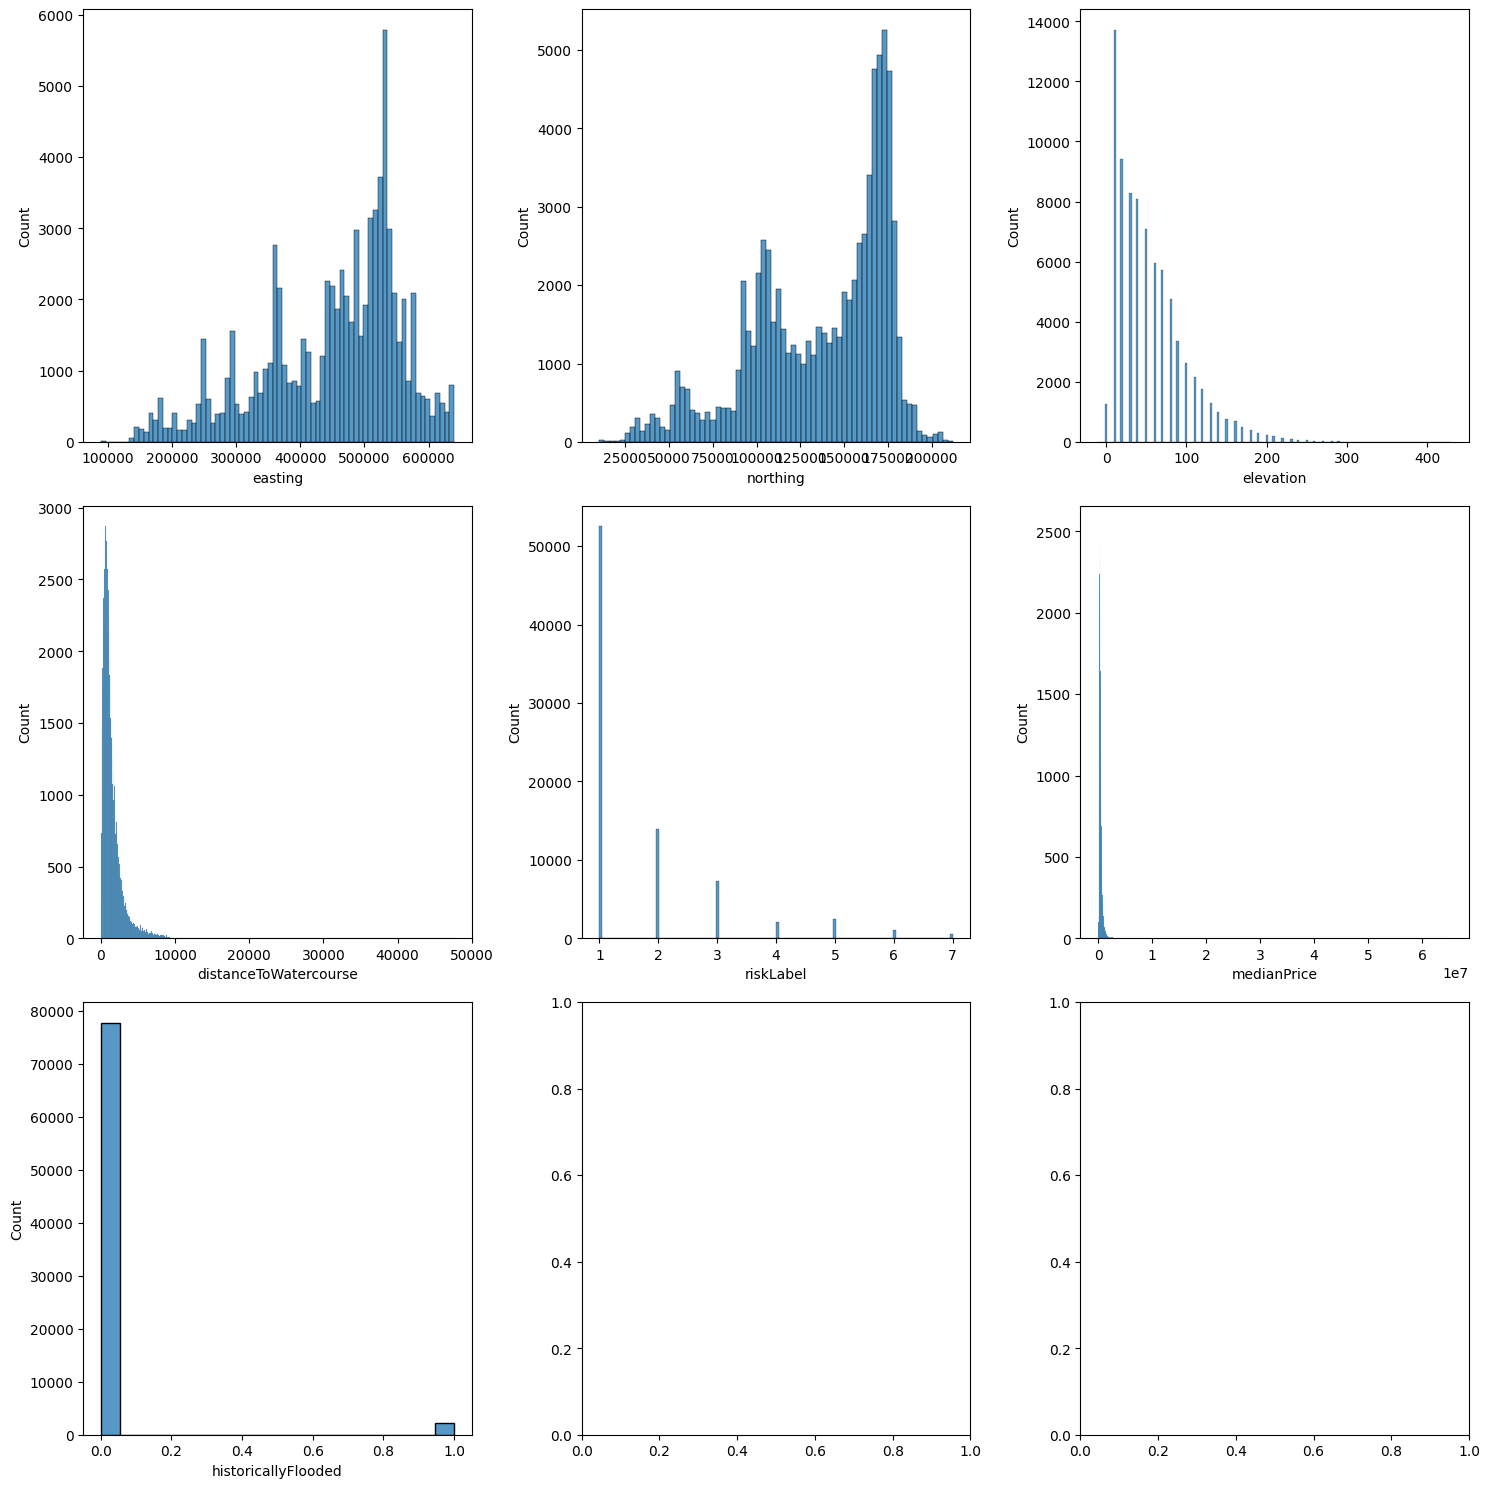

In [26]:
fig,ax = plt.subplots(3,3,figsize=(15,15))
ax = ax.flatten()

for i in range(0,len(num_cols)):
    sns.histplot(data[num_cols[i]], ax=ax[i])

plt.tight_layout()

<Axes: xlabel='medianPrice', ylabel='Count'>

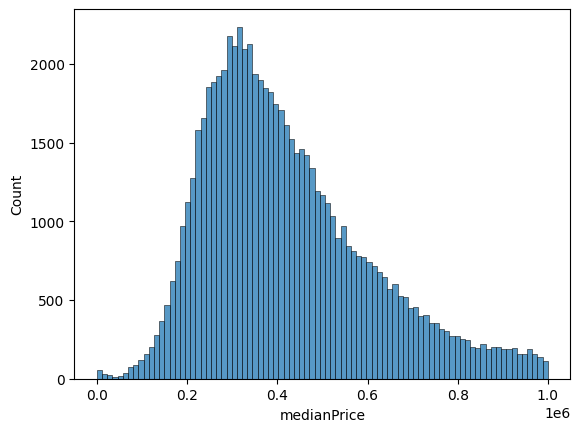

In [56]:
sns.histplot(data[data['medianPrice'] < 10e5]['medianPrice'])

In [27]:
data.describe()

,easting,northing,elevation,distanceToWatercourse,riskLabel,medianPrice,historicallyFlooded
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,7.379800e+04,80000.000000
mean,449902.946163,136927.660150,54.313500,1500.407625,1.669450,5.141523e+05,0.028125
std,108562.603117,38481.390032,43.631669,1517.951230,1.187615,9.093642e+05,0.165331
min,88849.000000,10216.000000,-10.000000,0.000000,1.000000,1.000000e+02,0.000000
25%,369302.750000,106788.500000,20.000000,630.000000,1.000000,2.924000e+05,0.000000
50%,476828.000000,149094.000000,40.000000,1090.000000,1.000000,3.984000e+05,0.000000
75%,530845.000000,169500.000000,80.000000,1840.000000,2.000000,5.649750e+05,0.000000
max,639867.000000,212063.000000,430.000000,47630.000000,7.000000,6.540120e+07,1.000000


In [ ]:
# no outliers in the location data
data [data['northing'].min() == data['northing']]

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded
76164,TR21 0NH,91403,10216,Histosols,10,NaN,46320.0,Isles of Scilly,2,404000.0,0


In [41]:
data[data['medianPrice'].max() == data['medianPrice']]

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded
32646,KT2 7EQ,521583,169949,Unsurveyed/Urban,20,Beverley Brook,370.0,Kingston upon Thames,2,65401200.0,0


In [50]:
# outliers in the median price data
data.sort_values(by='medianPrice', ascending=False)

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded
32646,KT2 7EQ,521583,169949,Unsurveyed/Urban,20,Beverley Brook,370.0,Kingston upon Thames,2,65401200.0,0
59744,SO18 2FA,444493,116317,Unsurveyed/Urban,10,Monks Brook,1240.0,Southampton,2,56635800.0,0
52555,SE1 5HL,534313,178398,Unsurveyed/Urban,10,Upper Pool,1890.0,Southwark,4,54316900.0,0
79210,UB11 1HU,508321,180160,Unsurveyed/Urban,40,Grand Union Canal,1370.0,Hillingdon,1,43672800.0,0
79207,UB11 1BJ,508643,180069,Unsurveyed/Urban,30,Grand Union Canal,1030.0,Hillingdon,1,43664200.0,0
...,...,...,...,...,...,...,...,...,...,...,...
78687,TW6 3RZ,507394,174055,Unsurveyed/Urban,20,River Colne,3740.0,Hillingdon,2,NaN,0
78688,TW6 3TX,507000,175910,Unsurveyed/Urban,20,River Colne,2650.0,Hillingdon,2,NaN,0
78689,TW6 3UB,507000,175900,Unsurveyed/Urban,20,River Colne,2650.0,Hillingdon,2,NaN,0
78690,TW6 3YB,508262,174483,Unsurveyed/Urban,30,Duke of Northumberland's River,2070.0,Hillingdon,1,NaN,0


In [34]:
num_cols = data.select_dtypes(include=[np.number]).columns
num_cols_1 = num_cols.drop(['medianPrice'])

<Axes: >

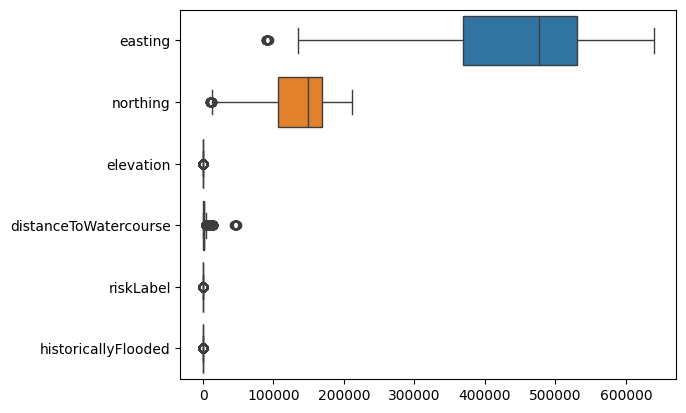

In [38]:
sns.boxplot(data[num_cols_1], orient='h')

In [ ]:
data['easting']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.

preprocessor = Pipeline([